Connected to Python 3.10.12

In [1]:
###
'''
goal-
decouple components of molecule
make a molecule class
clean up weird stuff
'''
###

import structuremaker as sm
import structure_math as smt
import numpy as np
import os


class Atom:
    def __init__(self):
        self.type = None
        self.isotope_mass = None
        self.charge = 0
        self.spin = 0
        

class Molecule:
    def __init__(self):
        self.atom_coords = {} #maps keys to numpy arrays
        self.num_atoms = 0 #number of non-R atoms
        self.num_r_atoms = 0 #number of R atoms
        #not implemented yet
        self.atom_info = {} #maps keys to Atom objects
        
    def __init__(self, atom_dict):
        '''
        for the time being, this assumes your atom
        has no r groups
        '''
        self.atom_coords = atom_dict
        self.num_atoms = len(atom_dict)
        self.num_r_atoms = 0
        self.atom_info = {}        

    def __init__(self, filename):
        extension = os.splitext(filename)[1]
        if extension == '.xyz':
            self.atom_coords, self.num_atoms, self.num_r_atoms = sm.read_xyz(filename)
        # if extension == '.out':
        #     self.atom_coords, self.num_atoms, self.num_r_atoms = sm.read_out(filename)
        else:
            raise ValueError('Invalid file type. Must be .xyz')
        
    def show(self, **kwargs):
        sm.show(self.atom_coords, **kwargs)
        
    def show_rotate(self, angle, **kwargs):
        sm.rotate_view(self.atom_coords, angle, **kwargs)
    
    def transform(self, matrix):
        self.atom_coords = smt.transform(self.atom_coords, matrix)
    
    def translate(self, vector):
        self.atom_coords = smt.translate(self.atom_coords, vector)
    
    def get_atom_info(self, atom):
        return self.atom_info[atom]
    
    def get_coords(self, atom):
        return self.atom_coords[atom]
    
    def get_vector(self, atom1, atom2):
        return self.atom_coords[atom2] - self.atom_coords[atom1]
    
    def get_plane_normal(self, atom1, atom2, atom3):
        v1 = self.get_vector(atom1, atom2)
        v2 = self.get_vector(atom2, atom3)
        if np.allclose(np.cross(v1, v2), np.array([0,0,0])):
            return np.array([0,0,0])
        return np.cross(v1, v2) / np.linalg.norm(np.cross(v1, v2))
    
    def add_atom(self, atom_symbol, coords, atom_data=None):
        psuedo_atom = {atom_symbol: coords}
        self.atom_coords = sm.make_molecule_union(self.atom_coords, psuedo_atom)
        if atom_symbol.startswith('R'):
            self.num_r_atoms += 1
        else:
            self.num_atoms += 1
    
    def remove_atom(self, atom):
        del self.atom_coords[atom]
        self.atom_coords = sm.condense_dict(self.atom_coords)
        if atom.startswith('R'):
            self.num_r_atoms -= 1
        else:  
            self.num_atoms -= 1
    
    def union_with(self, other_molecule):
        self.atom_coords = sm.make_molecule_union(self.atom_coords, other_molecule.atom_coords)
        self.num_atoms += other_molecule.num_atoms
        self.num_r_atoms += other_molecule.num_r_atoms
        
    def add_group(self, keys, group, g_keys, spatial_args=[0,1.2]):
        self.atom_coords = sm.add_group(self.atom_coords, keys, group.atom_coords, g_keys, spatial_args)
        self.num_atoms, self.num_r_atoms = sm.count_atoms(self.atom_coords)
        
    def prune_close_atoms(self, threshold):
        self.atom_coords = sm.prune_close_atoms(self.atom_coords, threshold)
        self.num_atoms, self.num_r_atoms = sm.count_atoms(self.atom_coords)
        
    def is_similar(self, other_molecule):
        return sm.similar(self.atom_coords, other_molecule.atom_dict)
    
    def write_xyz(self, filename, comment = None):
        sm.write_xyz(self.atom_coords, filename, comment)

In [2]:
pwd

'/home/zedo_heptulose/programming/Chemistry/StructureMaker/MolMakerClean'

In [3]:
ls

__pycache__/  molecule.py  pah.py      structure_math.py
lib/          output/      scratch.py  structuremaker.py


In [4]:
import molecule as mol

In [5]:
benzene = mol.Molecule(filename='lib/phenyl.xyz')

AttributeError: module 'os' has no attribute 'splitext'

Restarted Python 3.10.12

In [1]:
import molecule as mol
benzene = mol.Molecule(filename='lib/phenyl.xyz')

AttributeError: module 'structure_math' has no attribute 'distance'

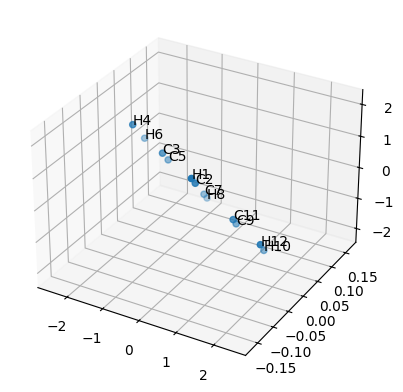

In [2]:
benzene.show()

Restarted Python 3.10.12

In [1]:
import molecule as mol
benzene = mol.Molecule(filename='lib/phenyl.xyz')

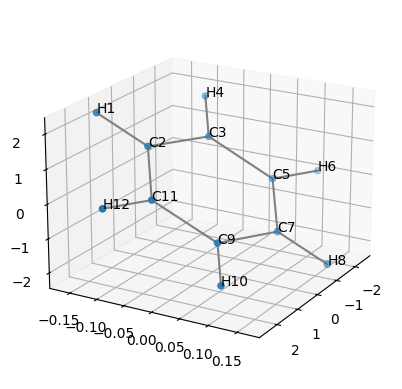

In [2]:
benzene.show()

Restarted Python 3.10.12

In [1]:
pwd

'/home/zedo_heptulose/programming/Chemistry/StructureMaker/MolMakerClean'

In [2]:
import utilities as ut

In [3]:
import molecule as mol

In [4]:
import molecule as mol
benzene = mol.Molecule(filename='lib/phenyl.xyz')
benzene.show()

FileNotFoundError: [Errno 2] No such file or directory: 'lib/phenyl.xyz'

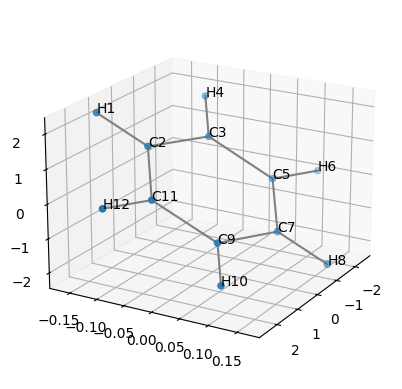

In [5]:
import molecule as mol
benzene = mol.Molecule(filename='lib/benzene.xyz')
benzene.show()

In [6]:
templates = ut.get_templates('lib')

UnboundLocalError: local variable 'mol' referenced before assignment

In [7]:
import molecule as mol
import utilities as ut
templates = ut.get_templates('lib')

UnboundLocalError: local variable 'mol' referenced before assignment

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
templates = ut.get_templates('lib')

In [2]:
templates

{'core': <molecule.Molecule at 0x7f44bf3b3130>,
 'ethyne': <molecule.Molecule at 0x7f44bf3b3160>,
 'benzene': <molecule.Molecule at 0x7f44bf3b3850>,
 'ethylene': <molecule.Molecule at 0x7f44bf3b38b0>,
 'biphenyl': <molecule.Molecule at 0x7f44bf3b3a60>,
 'halfcore': <molecule.Molecule at 0x7f44bf3b3220>}

In [3]:
t = templates

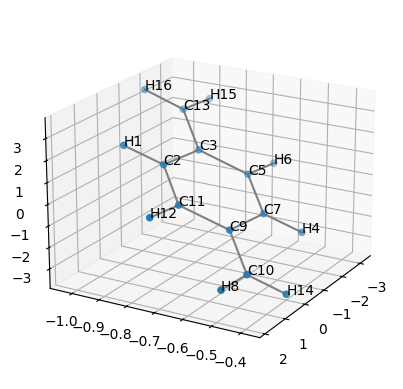

In [4]:
t['core'].show()

In [5]:
t

{'core': <molecule.Molecule at 0x7f44bf3b3130>,
 'ethyne': <molecule.Molecule at 0x7f44bf3b3160>,
 'benzene': <molecule.Molecule at 0x7f44bf3b3850>,
 'ethylene': <molecule.Molecule at 0x7f44bf3b38b0>,
 'biphenyl': <molecule.Molecule at 0x7f44bf3b3a60>,
 'halfcore': <molecule.Molecule at 0x7f44bf3b3220>}

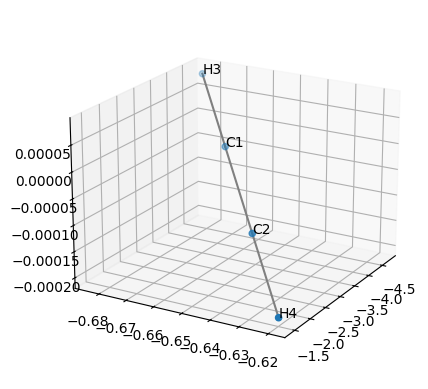

In [6]:
t['ethyne'].show()

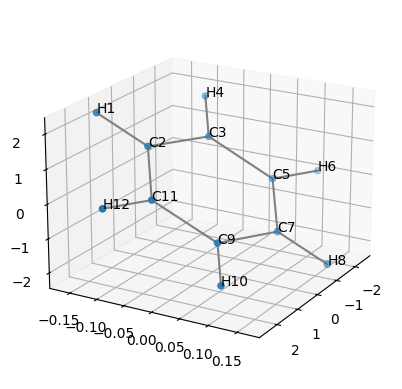

In [7]:
t['benzene'].show()

In [8]:
ls

__pycache__/  molecule.py  pah.py      structure_math.py  utilities.py
lib/          output/      scratch.py  structuremaker.py


In [9]:
t

{'core': <molecule.Molecule at 0x7f44bf3b3130>,
 'ethyne': <molecule.Molecule at 0x7f44bf3b3160>,
 'benzene': <molecule.Molecule at 0x7f44bf3b3850>,
 'ethylene': <molecule.Molecule at 0x7f44bf3b38b0>,
 'biphenyl': <molecule.Molecule at 0x7f44bf3b3a60>,
 'halfcore': <molecule.Molecule at 0x7f44bf3b3220>}

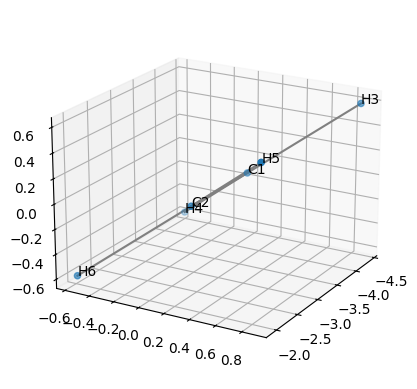

In [10]:
t['ethylene'].show()

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
templates = ut.get_templates('lib')

In [2]:
t = templates

In [3]:
t

{'p_quinodimethane': <molecule.Molecule at 0x7f2f5e1b7130>,
 'alkene': <molecule.Molecule at 0x7f2f5e1b7160>,
 'benzene': <molecule.Molecule at 0x7f2f5e1b7850>,
 'biphenyl': <molecule.Molecule at 0x7f2f5e1b7940>,
 'alkyne': <molecule.Molecule at 0x7f2f5e1b7a60>,
 'halfcore': <molecule.Molecule at 0x7f2f5e1b7880>}

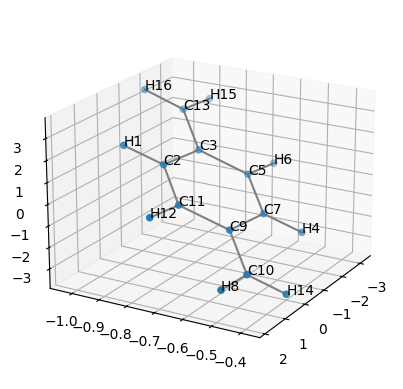

In [4]:
t['p_quinodimethane'].show()

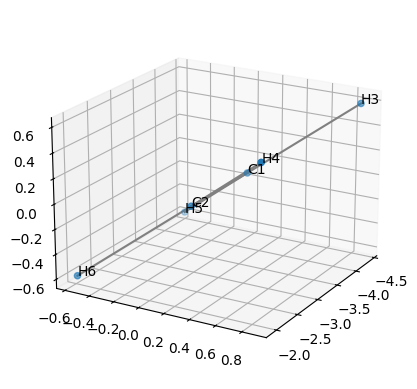

In [5]:
t['alkene'].show()

In [6]:
t

{'p_quinodimethane': <molecule.Molecule at 0x7f2f5e1b7130>,
 'alkene': <molecule.Molecule at 0x7f2f5e1b7160>,
 'benzene': <molecule.Molecule at 0x7f2f5e1b7850>,
 'biphenyl': <molecule.Molecule at 0x7f2f5e1b7940>,
 'alkyne': <molecule.Molecule at 0x7f2f5e1b7a60>,
 'halfcore': <molecule.Molecule at 0x7f2f5e1b7880>}

In [7]:
t['biphenyl']

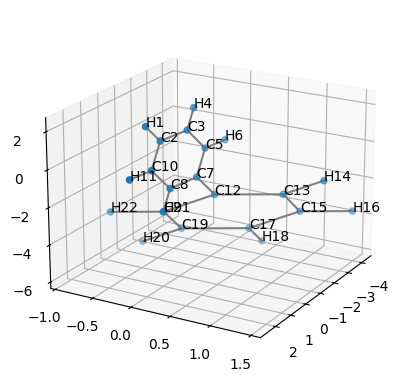

In [8]:
t['biphenyl'].show()

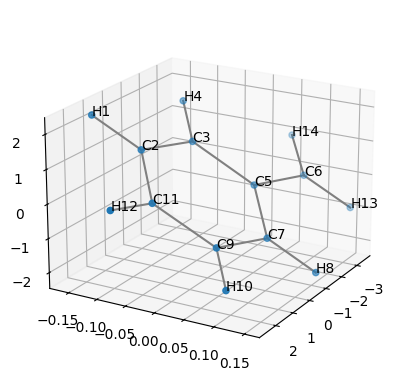

In [9]:
t['halfcore'].show()

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
templates = ut.get_templates('lib')

ValueError: not enough values to unpack (expected 2, got 1)

In [2]:
import molecule as mol
import utilities as ut
templates = ut.get_templates('lib')

ValueError: not enough values to unpack (expected 2, got 1)

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
templates = ut.get_templates('lib')

In [2]:
templates

{'p_quinodimethane': (<molecule.Molecule at 0x7f8f123b3160>,
  {'1': ('H16', 'C13', 'C3'),
   '2': ('H15', 'C13', 'C3'),
   '3': ('H14', 'C10', 'C9'),
   '4': ('H8', 'C10', 'C9')}),
 'alkene': (<molecule.Molecule at 0x7f8f123b3190>,
  {'1': ('H6', 'C2', 'C1'),
   '2': ('H5', 'C2', 'C1'),
   '3': ('H4', 'C1', 'C2'),
   '4': ('H3', 'C1', 'C2')}),
 'benzene': (<molecule.Molecule at 0x7f8f123b3880>,
  {'1': ('H12', 'C11', 'C9'),
   '2': ('H10', 'C9', 'C7'),
   '3': ('H8', 'C7', 'C5'),
   '4': ('H6', 'C5', 'C3'),
   '5': ('H4', 'C3', 'C2'),
   '6': ('H1', 'C2', 'C11')}),
 'biphenyl': (<molecule.Molecule at 0x7f8f123b3970>,
  {'1': ('H17', 'C17', 'C15'), '2': ('H1', 'C2', 'C10')}),
 'alkyne': (<molecule.Molecule at 0x7f8f123b3a90>,
  {'1': ('H4', 'C2', 'C1'), '2': ('H3', 'C1', 'C2')}),
 'halfcore': (<molecule.Molecule at 0x7f8f123b38b0>,
  {'1': ('H14', 'C6', 'C5'),
   '2': ('H13', 'C6', 'C5'),
   '3': ('H12', 'C11', 'C9')})}

In [3]:
t = templates

In [4]:
structure = t['halfcore']

In [5]:
structure = t['halfcore'].copy()

AttributeError: 'tuple' object has no attribute 'copy'

In [6]:
t['halfcore']

(<molecule.Molecule at 0x7f8f123b38b0>,
 {'1': ('H14', 'C6', 'C5'),
  '2': ('H13', 'C6', 'C5'),
  '3': ('H12', 'C11', 'C9')})

In [7]:
structure = t['halfcore'][0]

In [8]:
structure = t['halfcore'][0].copy()

AttributeError: 'Molecule' object has no attribute 'copy'

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
t = ut.get_templates('lib')
structure = t['halfcore'][0].copy()

AttributeError: 'Molecule' object has no attribute 'copy'

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
t = ut.get_templates('lib')
structure = t['halfcore'][0].copy()

AttributeError: 'Molecule' object has no attribute 'copy'

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
t = ut.get_templates('lib')
structure = t['halfcore'][0].copy()

TypeError: Molecule.__init__() missing 1 required positional argument: 'filename'

Restarted Python 3.10.12

In [1]:
import molecule as mol
import utilities as ut
t = ut.get_templates('lib')
structure = t['halfcore'][0].copy()

In [2]:
structure

TypeError: string indices must be integers

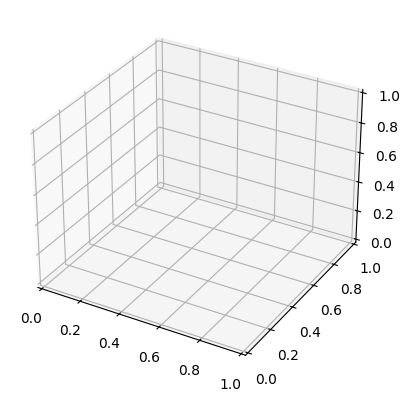

In [3]:
structure.show()

Restarted Python 3.10.12

TypeError: string indices must be integers

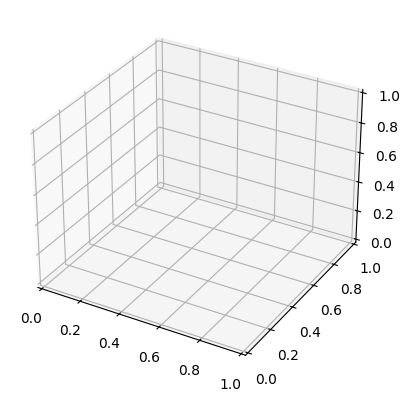

In [1]:
import molecule as mol
import utilities as ut
t = ut.get_templates('lib')
structure = t['halfcore'][0].copy()
structure.show()

Restarted Python 3.10.12

old atom coords 
lib/halfcore.xyz
new atom coords: 
lib/halfcore.xyz


TypeError: string indices must be integers

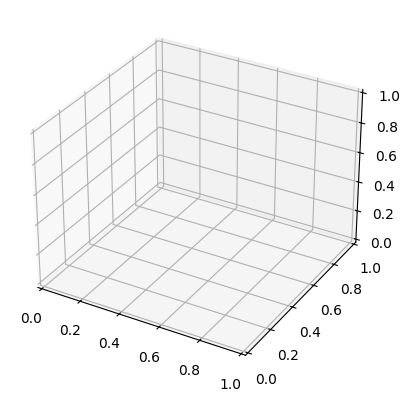

In [1]:
import molecule as mol
import utilities as ut
t = ut.get_templates('lib')
structure = t['halfcore'][0].copy()
structure.show()

Restarted Python 3.10.12